In [26]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import random as ran
from IPython.display import clear_output
from src import spotify, dp, utils, DB
from sklearn.metrics.pairwise import euclidean_distances as euc
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt

db = DB()

In [28]:
ms = utils.MatchingSystem()

# K Checking
- 새로운 K의 갯수를 만들 수 있는지 확인하는 과정

In [29]:
ms.check()

현재 seed 음악 갯수 : 334
K 갯수 : 13 (후에 체크 방식으로 진행)


# KMeans Run

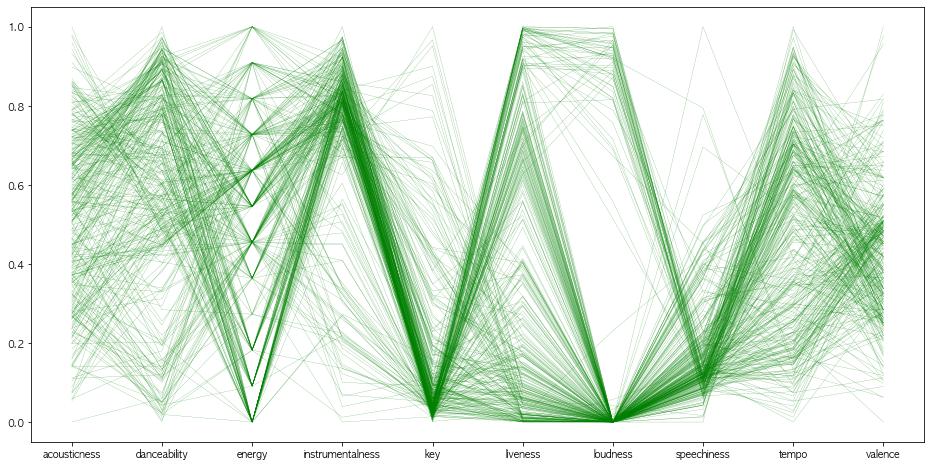

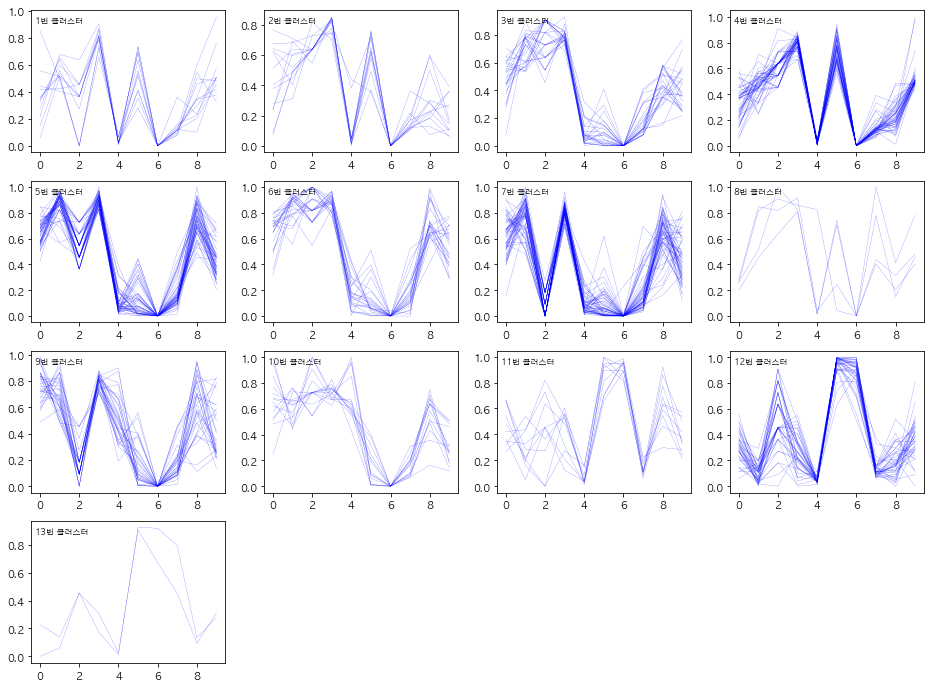

In [30]:
ms.kmeans_run()

clear_output(wait=True)

norm_features = ms.norm_features
kmeans = ms.kmeans

utils.visual_norm_data(None, norm_features)
utils.visual_cluster_data(norm_features, kmeans)

# Mail Box Matching

In [31]:
ms.box_matching()

ms.mail_box_radar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
623f2515ff1c441a392ab38c,0,0,0,0,0,0,0,0,0,0,0,100,0
623f2515ff1c441a392ab38d,31,0,0,62,0,6,0,0,0,0,0,0,0
623f2515ff1c441a392ab38e,0,0,0,50,0,0,0,0,0,0,0,50,0
623f2515ff1c441a392ab38f,0,0,0,83,11,6,0,0,0,0,0,0,0
623f2515ff1c441a392ab390,0,0,0,0,0,14,0,0,14,71,0,0,0


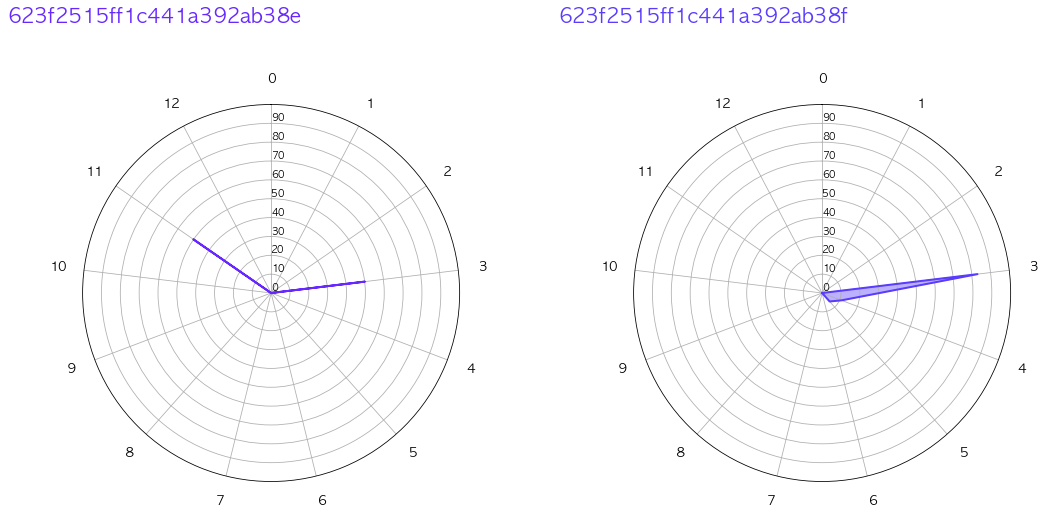

계속 진행하시려면 next, 종료는 아무거나 입력해주세요.exit


In [32]:
ms.visual_radar_step()

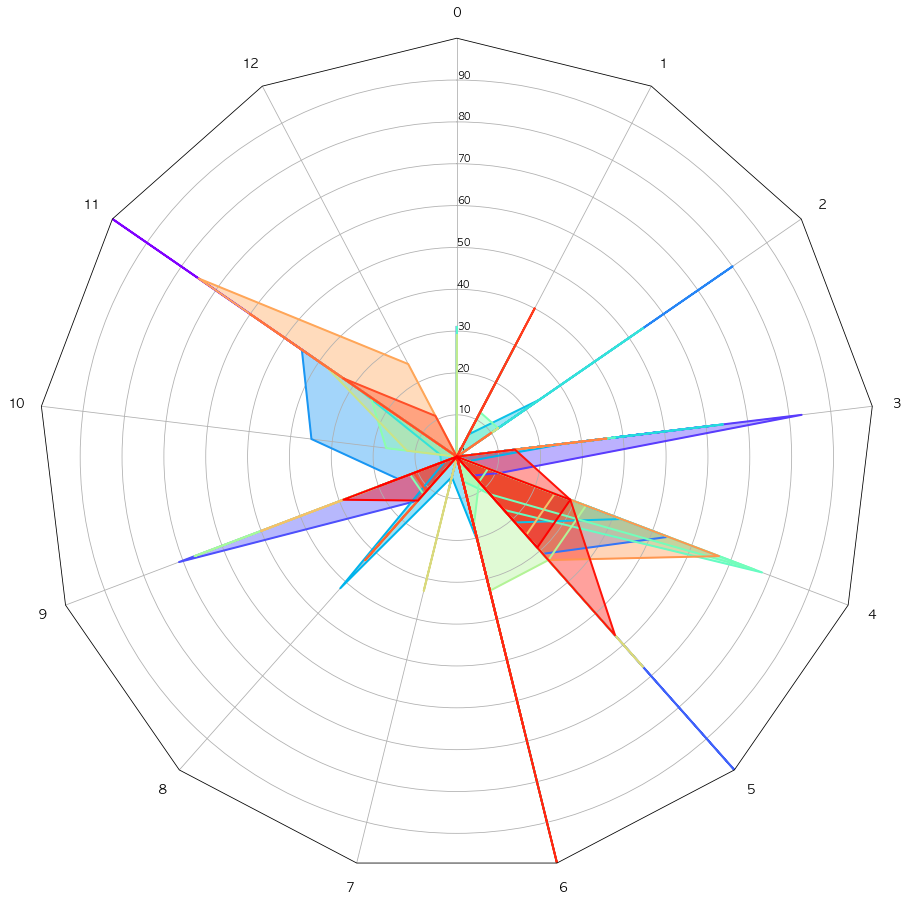

In [33]:
ms.visual_radar()

Mail Box Points Save Success.


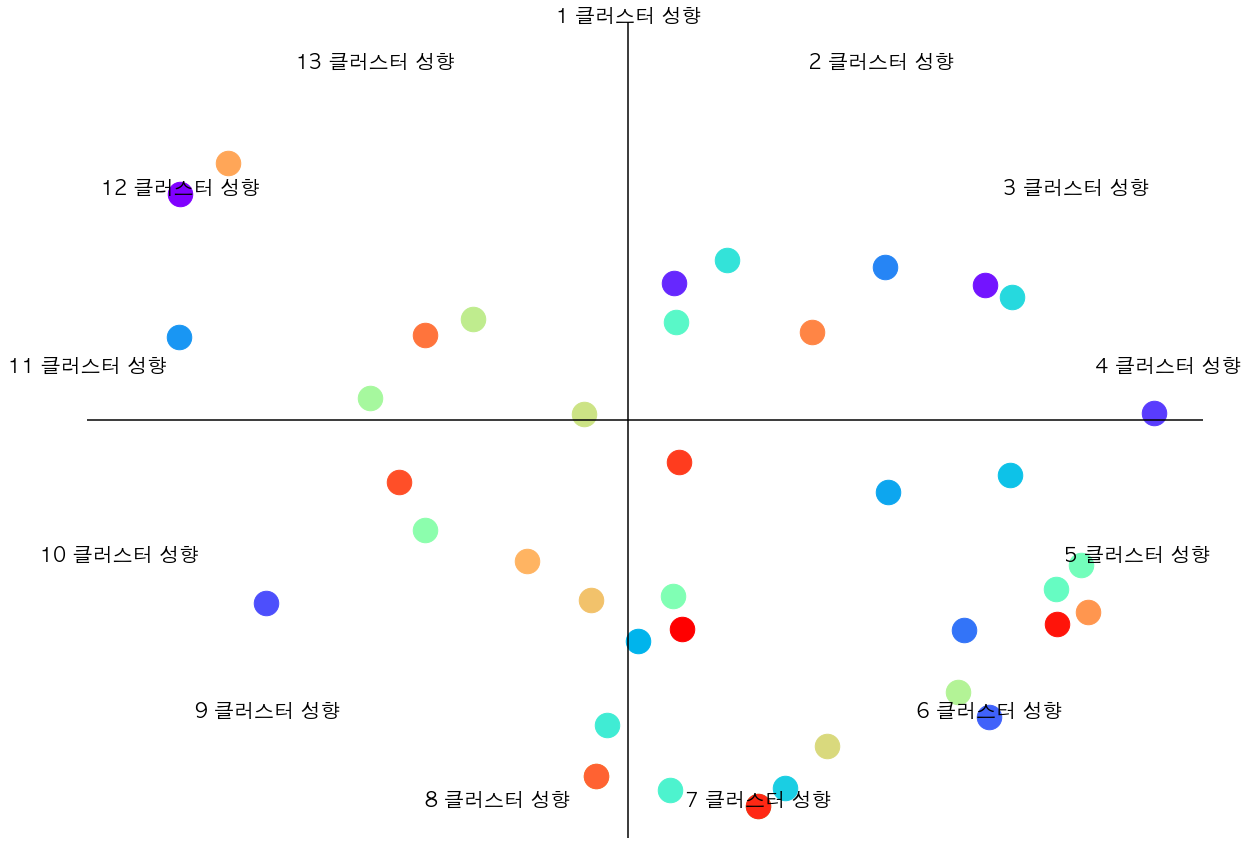

,x,y
623f2515ff1c441a392ab38c,-82.298387,56.806475
623f2515ff1c441a392ab38d,65.526686,33.982210
623f2515ff1c441a392ab38e,8.486250,34.430071
623f2515ff1c441a392ab38f,96.658751,1.612826
623f2515ff1c441a392ab390,-66.386153,-46.135248


In [35]:
ms.make_coord()
ms.visual_coord()

ms.mail_box_points.head()

# 유사도 확인

In [36]:
check_idx = 6

rate_x = 50
rate_y = 50

_my_box_id = ms.mail_box_points.iloc[check_idx].name
user_centroid = ms.mail_box_points.iloc[check_idx].values
user_x, user_y = user_centroid

search_box = ms.mail_box_points[
    ((ms.mail_box_points['x'] < (user_x + rate_x)) & (ms.mail_box_points['x'] > (user_x - rate_x))) &
    ((ms.mail_box_points['y'] < (user_y + rate_y)) & (ms.mail_box_points['y'] > (user_y - rate_y)))
]

search_box

,x,y
623f2515ff1c441a392ab391,66.312266,-74.851075
623f2516ff1c441a392ab392,61.653024,-52.956871
623f2516ff1c441a392ab395,47.771923,-18.080126
623f2745ff1c441a392ab40b,70.126112,-13.793470
623f2745ff1c441a392ab40c,28.801470,-92.779823
623f2746ff1c441a392ab412,78.594255,-42.511493
623f2746ff1c441a392ab413,83.242939,-36.445015
623f2abbff1c441a392ab4c5,23.931566,-97.094182
623f2abbff1c441a392ab4c7,60.636001,-68.443896
623f2abcff1c441a392ab4ca,36.531801,-82.191300


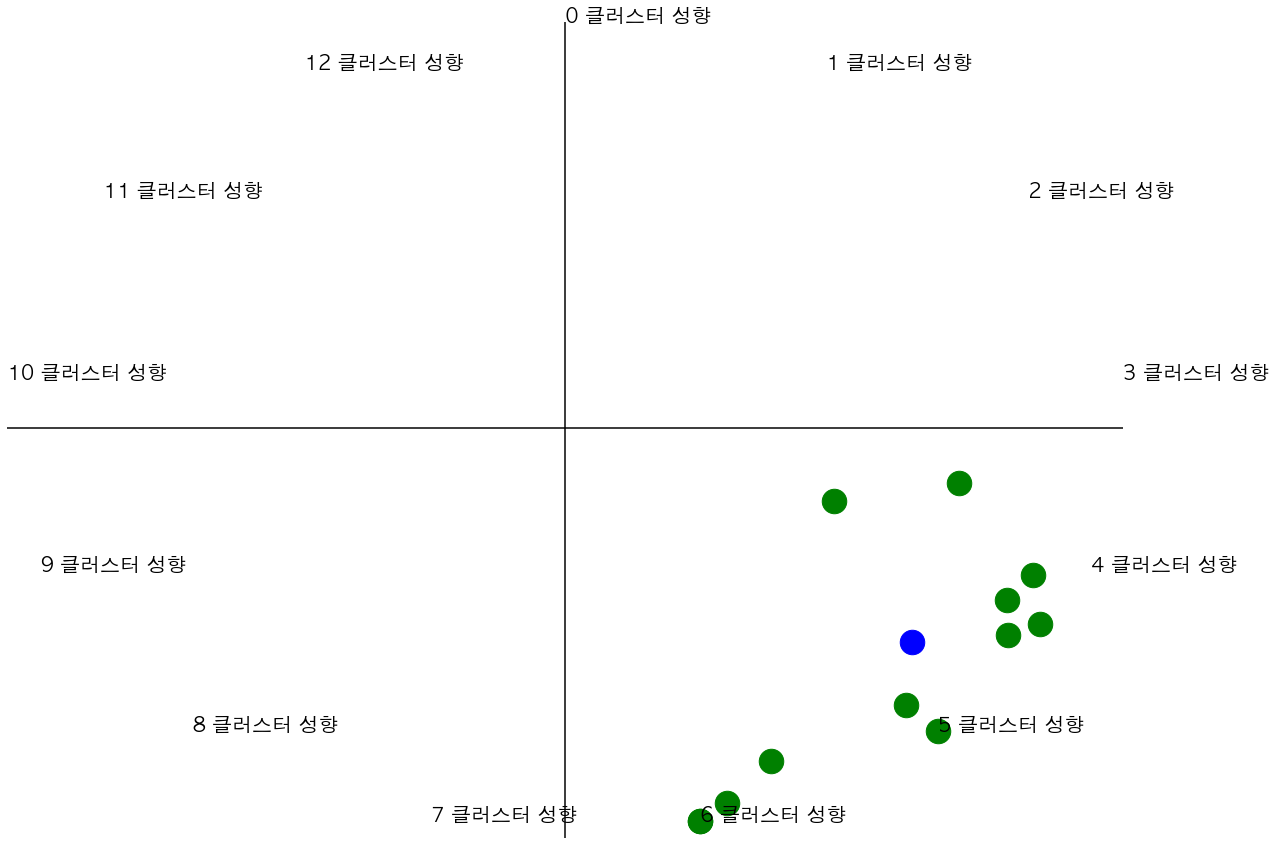

In [37]:
plt.figure(figsize=(20, 15))

for idx, pt in enumerate(search_box.values):
    b_id = search_box.index[idx]
    
    x = pt[0]
    y = pt[1]
    plt.scatter(x, y, s=600, color='b' if b_id == _my_box_id else 'g', label=ms.mail_box_radar.index[idx])
    
for idx, pt in enumerate(ms.max_coord):
    plt.text(pt[0], pt[1],"{} 클러스터 성향".format(idx), fontsize=20)

plt.xticks([
    ms.max_coord[:,0].min(),
    ms.max_coord[:,0].max()
])
plt.yticks([
    ms.max_coord[:,1].min(),
    ms.max_coord[:,1].max()
])

plt.axhline(
    0, color='black'
)
plt.axvline(
    0, color='black'
)
plt.axis("off")
# plt.legend()

plt.show()

In [38]:
tracks = pd.DataFrame()
reco_ids = list()

for box in ms.mail_boxes:
    _id = box['_id']
    
    if str(_id) in search_box.index:
        _box_tracks = pd.DataFrame(box['tracks'])
        _box_tracks['box_id'] = str(_id)
        
        tracks = pd.concat([tracks,_box_tracks], ignore_index=True)
        reco_ids.append(str(_id))
        
tracks.rename({"track_id": "id"}, axis=1,inplace=True)
tracks.head()

,id,name,artists,artists_name,box_id
0,3dbLT62Cvs46Ju7a8gpr36,Savage,6YVMFz59CuY7ngCxTxjpxE,aespa,623f2515ff1c441a392ab391
1,2qJjNAljfrYm7slPCXzRtC,Shine,1dTvYIUWdOcBXYyUWhi91W,Girls Planet 999,623f2515ff1c441a392ab391
2,6tU92qp9bJWAW86IHUggUa,Summer or Summer,"78sJswwVn4P8aEhkF4K6fQ,6xxFNpc17jiiVZzOCgdLyv","Hyolyn,DASOM",623f2515ff1c441a392ab391
3,0S6giCcEzgm7SzK6cczMKc,Q&A,3IJCdgkBZbieocLZ4e94GZ,Cherry Bullet,623f2515ff1c441a392ab391
4,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park,623f2516ff1c441a392ab392


In [39]:
merge_features = pd.merge(tracks, norm_features, on="id")

merge_features.head()

,id,name,artists,artists_name,box_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3dbLT62Cvs46Ju7a8gpr36,Savage,6YVMFz59CuY7ngCxTxjpxE,aespa,623f2515ff1c441a392ab391,0.686649,0.88971,0.818182,0.967201,0.264857,0.12457,0.000012,0.283056,0.698815,0.596867
1,3dbLT62Cvs46Ju7a8gpr36,Savage,6YVMFz59CuY7ngCxTxjpxE,aespa,623f2516ff1c441a392ab392,0.686649,0.88971,0.818182,0.967201,0.264857,0.12457,0.000012,0.283056,0.698815,0.596867
2,3dbLT62Cvs46Ju7a8gpr36,Savage,6YVMFz59CuY7ngCxTxjpxE,aespa,623f2745ff1c441a392ab40b,0.686649,0.88971,0.818182,0.967201,0.264857,0.12457,0.000012,0.283056,0.698815,0.596867
3,3dbLT62Cvs46Ju7a8gpr36,Savage,6YVMFz59CuY7ngCxTxjpxE,aespa,623f2746ff1c441a392ab412,0.686649,0.88971,0.818182,0.967201,0.264857,0.12457,0.000012,0.283056,0.698815,0.596867
4,3dbLT62Cvs46Ju7a8gpr36,Savage,6YVMFz59CuY7ngCxTxjpxE,aespa,623f2746ff1c441a392ab413,0.686649,0.88971,0.818182,0.967201,0.264857,0.12457,0.000012,0.283056,0.698815,0.596867


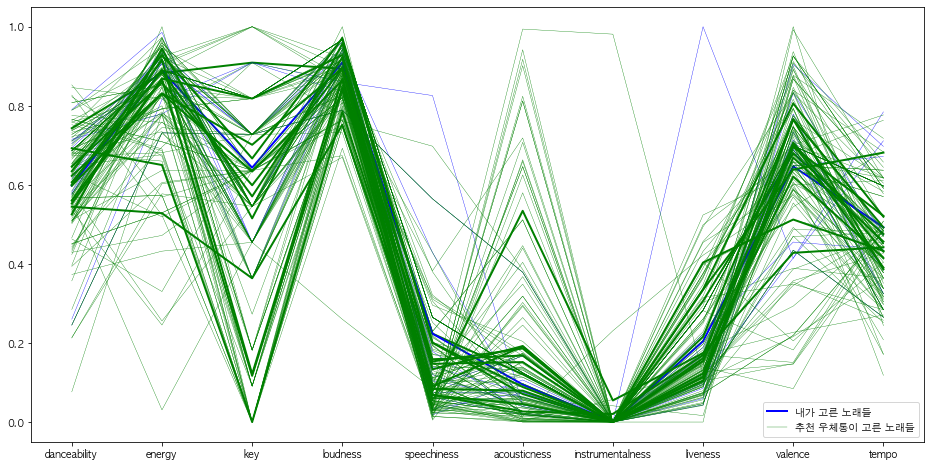

In [40]:
feature_columns = ['danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(16,8))

for box_id in reco_ids:
    _features = merge_features[
        merge_features['box_id'] == box_id
    ]
    
    plt.plot(_features[feature_columns].T.mean(axis=1), color='b' if box_id == _my_box_id else 'g',
            linewidth=2, label='내가 고른 노래들' if box_id == _my_box_id else '추천 우체통이 고른 노래들')
    plt.plot(_features[feature_columns].T, color='b' if box_id == _my_box_id else 'g',
            linewidth=0.35)


plt.xticks(feature_columns)
leg = plt.legend(['내가 고른 노래들', '추천 우체통이 고른 노래들'])

leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('g')

plt.show()

In [41]:
my_features = merge_features[
    merge_features['box_id'] == _my_box_id
]
my_mean = my_features[feature_columns].mean(axis=0).values
my_mean = np.expand_dims(my_mean, axis=0)

reco_features = my_features = merge_features[
    merge_features['box_id'] != _my_box_id
]
reco_features = reco_features[feature_columns].values

print("평균 노래 거리 차이 :",euc(my_mean,
   reco_features)[0].mean())

평균 노래 거리 차이 : 0.5215955240702306


In [42]:
rate_x = 50
rate_y = 50

_my_box_id = ms.mail_box_points.iloc[check_idx].name
user_centroid = ms.mail_box_points.iloc[check_idx].values
user_x, user_y = user_centroid

search_box = ms.mail_box_points[~(
    ((ms.mail_box_points['x'] < (user_x + rate_x)) & (ms.mail_box_points['x'] > (user_x - rate_x))) &
    ((ms.mail_box_points['y'] < (user_y + rate_y)) & (ms.mail_box_points['y'] > (user_y - rate_y)))
)]

search_box = search_box.append(ms.mail_box_points.iloc[check_idx])

search_box.head()

,x,y
623f2515ff1c441a392ab38c,-82.298387,56.806475
623f2515ff1c441a392ab38d,65.526686,33.982210
623f2515ff1c441a392ab38e,8.486250,34.430071
623f2515ff1c441a392ab38f,96.658751,1.612826
623f2515ff1c441a392ab390,-66.386153,-46.135248


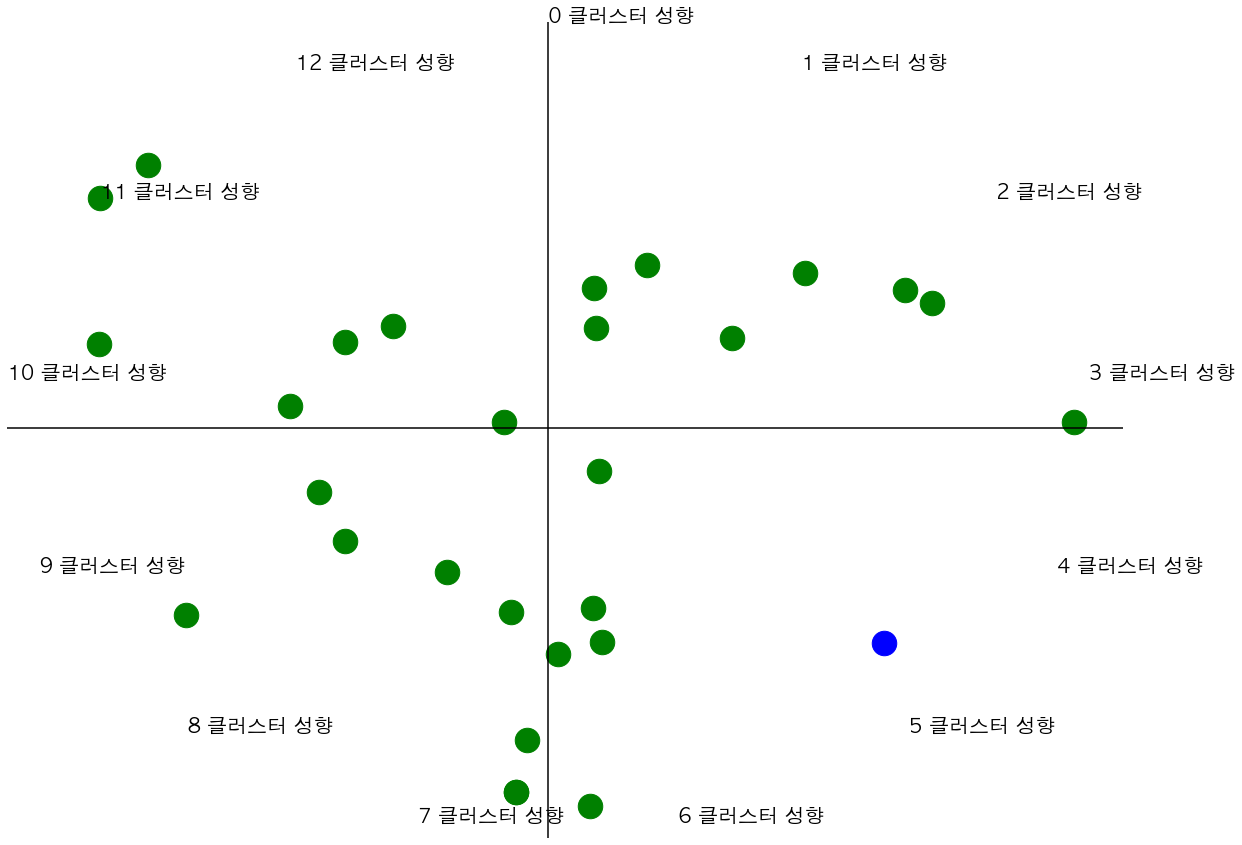

In [43]:
plt.figure(figsize=(20, 15))

for idx, pt in enumerate(search_box.values):
    b_id = search_box.index[idx]
    
    x = pt[0]
    y = pt[1]
    plt.scatter(x, y, s=600, color='b' if b_id == _my_box_id else 'g', label=ms.mail_box_radar.index[idx])
    
for idx, pt in enumerate(ms.max_coord):
    plt.text(pt[0], pt[1],"{} 클러스터 성향".format(idx), fontsize=20)

plt.xticks([
    ms.max_coord[:,0].min(),
    ms.max_coord[:,0].max()
])
plt.yticks([
    ms.max_coord[:,1].min(),
    ms.max_coord[:,1].max()
])

plt.axhline(
    0, color='black'
)
plt.axvline(
    0, color='black'
)
plt.axis("off")
# plt.legend()

plt.show()

In [44]:
tracks = pd.DataFrame()
reco_ids = list()

for box in ms.mail_boxes:
    _id = box['_id']
    
    if str(_id) in search_box.index:
        _box_tracks = pd.DataFrame(box['tracks'])
        _box_tracks['box_id'] = str(_id)
        
        tracks = pd.concat([tracks,_box_tracks], ignore_index=True)
        reco_ids.append(str(_id))
        
tracks.rename({"track_id": "id"}, axis=1,inplace=True)
tracks.head()

,id,name,artists,artists_name,box_id
0,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2515ff1c441a392ab38c
1,2yiISACbYnL2hApy1ffKKs,Misty - Remastered 2020,6C65D20ASusYqHGSIktfED,Erroll Garner,623f2515ff1c441a392ab38c
2,79chL6wRWGUCF5V5qKZtf0,Clair de Lune - Debussy,22pAlZRKZ8WyPTtf63Y5nV,Exam Study Classical Music Orchestra,623f2515ff1c441a392ab38c
3,58yFroDNbzHpYzvicaC0de,Peace Piece,4jXfFzeP66Zy67HM2mvIIF,Bill Evans,623f2515ff1c441a392ab38c
4,7KRaeLuGqHJNhU3V3Vw67Z,Dark Night of the Soul,7xaLfXBI5MSy3aNX7m4X3O,Philip Wesley,623f2515ff1c441a392ab38c


In [45]:
merge_features = pd.merge(tracks, norm_features, on="id")

merge_features.head()

,id,name,artists,artists_name,box_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2515ff1c441a392ab38c,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436
1,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2515ff1c441a392ab38e,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436
2,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2516ff1c441a392ab394,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436
3,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2746ff1c441a392ab40e,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436
4,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,623f2abbff1c441a392ab4c4,0.557221,0.030677,0.454545,0.25992,0.08376,0.993969,0.981112,0.119325,0.357399,0.426436


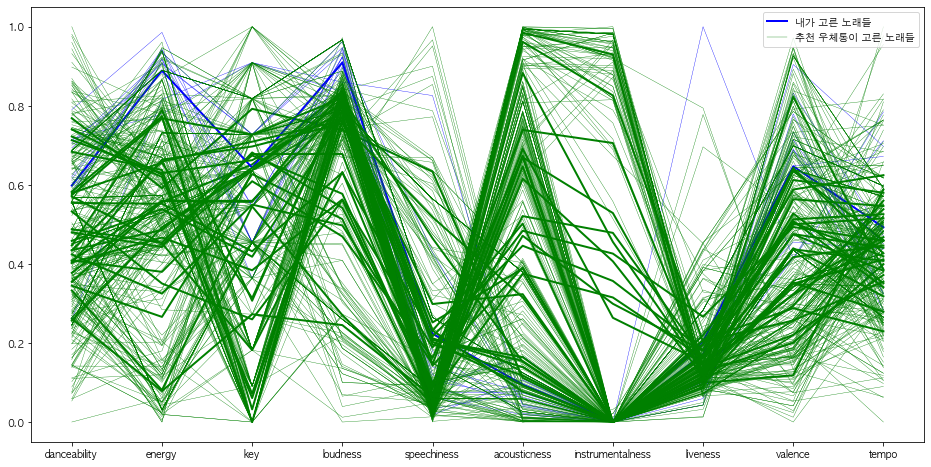

In [46]:
feature_columns = ['danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(16,8))

for box_id in reco_ids:
    _features = merge_features[
        merge_features['box_id'] == box_id
    ]
    
    plt.plot(_features[feature_columns].T.mean(axis=1), color='b' if box_id == _my_box_id else 'g',
            linewidth=2, label='내가 고른 노래들' if box_id == _my_box_id else '추천 우체통이 고른 노래들')
    plt.plot(_features[feature_columns].T, color='b' if box_id == _my_box_id else 'g',
            linewidth=0.35)


plt.xticks(feature_columns)
leg = plt.legend(['내가 고른 노래들', '추천 우체통이 고른 노래들'])

leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('g')

plt.show()

In [47]:
my_features = merge_features[
    merge_features['box_id'] == _my_box_id
]
my_mean = my_features[feature_columns].mean(axis=0).values
my_mean = np.expand_dims(my_mean, axis=0)

reco_features = my_features = merge_features[
    merge_features['box_id'] != _my_box_id
]
reco_features = reco_features[feature_columns].values

print("평균 노래 거리 차이 :",euc(my_mean,
   reco_features)[0].mean())

평균 노래 거리 차이 : 0.9813310602691375
